### Using CWT Preprocessing with 2D CNN

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten,Dropout
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import activations

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from load_data import *
from helpers import *
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%load_ext autoreload
%autoreload 2

In [2]:
# Loading full data
data_path = './data'

X_train_valid, y_train_valid, X_test, y_test, person_train_valid, person_test = load_full_data(data_path)

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115,)
Person test shape: (443,)


In [3]:
## Adjusting the labels to {0,1,2,3}

# left hand - 0
# right hand - 1
# feet motion - 2
# tongue motion - 3

# labels are given as {769, 770, 771, 772}
base = y_train_valid.min()
y_train_valid-= base
y_test-= base

In [4]:
# Getting data for individual subjects

subject_data_train = split_data_by_subject(X_train_valid, y_train_valid, person_train_valid)
subject_data_test = split_data_by_subject(X_test, y_test, person_test)

In [5]:
# Changing of data dimensions

print ('Shape of training set: {}'.format(X_train_valid.shape))
print ('Shape of test set: {}'.format(X_test.shape))
print ('Shape of train labels: {}'.format(y_train_valid.shape))
print ('Shape of test labels: {}'.format(y_test.shape))

y_train_cv = to_categorical(y_train_valid, 4)
y_test_cv = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:', y_train_cv.shape)
print('Shape of test labels after categorical conversion:', y_test_cv.shape)

# Adding width of the segment to be 1
x_train_cv = X_train_valid.reshape(X_train_valid.shape[0], X_train_valid.shape[1], X_train_valid.shape[2], 1)
x_test_cv = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print('Shape of training set after adding width info:',x_train_cv.shape)
print('Shape of test set after adding width info:',x_test_cv.shape)


# Reshaping the training and validation dataset
x_train_cv = np.swapaxes(x_train_cv, 1,3)
x_train_cv = np.swapaxes(x_train_cv, 1,2)

x_test_cv = np.swapaxes(x_test_cv, 1,3)
x_test_cv = np.swapaxes(x_test_cv, 1,2)
print('Shape of training set after dimension reshaping:',x_train_cv.shape)

print('Shape of test set after dimension reshaping:',x_test_cv.shape)

Shape of training set: (2115, 22, 1000)
Shape of test set: (443, 22, 1000)
Shape of train labels: (2115,)
Shape of test labels: (443,)
Shape of training labels after categorical conversion: (2115, 4)
Shape of test labels after categorical conversion: (443, 4)
Shape of training set after adding width info: (2115, 22, 1000, 1)
Shape of test set after adding width info: (443, 22, 1000, 1)
Shape of training set after dimension reshaping: (2115, 1000, 1, 22)
Shape of test set after dimension reshaping: (443, 1000, 1, 22)


In [6]:
# Splitting validation and training set into 80 - 20 ratio.

train_X, val_X, train_y, val_y = train_test_split(x_train_cv, y_train_cv, test_size=0.2, random_state=42)

K fold cross validation seems to be quite an overhead on computation. Therefore using dedicated validation, train and test set. 

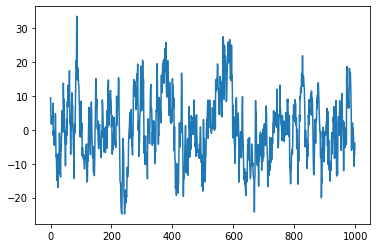

In [37]:
plt.plot(np.arange(1000), x_train_cv[0][:,:,1])

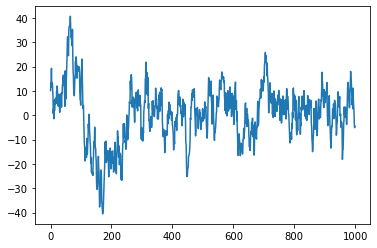

In [36]:
plt.plot(np.arange(1000), x_train_cv[1][:,:,1])

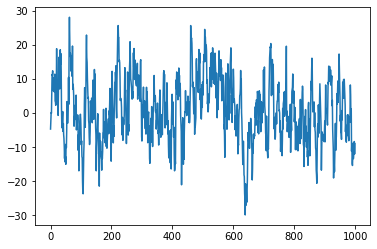

In [35]:
plt.plot(np.arange(1000), x_train_cv[2][:,:,1])

### Loading 2nd subject data

In [7]:
# X_train_valid, y_train_valid, X_test, y_test, person_train_valid, person_test

x_train_sub, y_train_sub, x_test_sub, y_test_sub = getSubjectData(X_train_valid, y_train_valid, X_test, y_test,
                                                                 person_train_valid, person_test, 2)

Shape of training labels after categorical conversion: (236, 4)
Shape of test labels after categorical conversion: (50, 4)
Shape of training set after adding width info: (236, 22, 1000, 1)
Shape of test set after adding width info: (50, 22, 1000, 1)
Shape of final training set:  (236, 1000, 1, 22)
Shape of final test set : (50, 1000, 1, 22)


#### Selecting 5 channels: 0,  5, 10, 15, 20 and first 500 instances of signal

In [8]:
channels = np.arange(0, 22, 5)

In [9]:
x_train_sub = x_train_sub[:, 0:500 , :, channels]
x_test_sub = x_test_sub[:, 0:500, :, channels]

#### CWT 

In [10]:
x_train_CWT = CWTScipy(x_train_sub, 250, 6)

Completed signal:  1
Completed signal:  2
Completed signal:  3
Completed signal:  4
Completed signal:  5
Completed signal:  6
Completed signal:  7
Completed signal:  8
Completed signal:  9
Completed signal:  10
Completed signal:  11
Completed signal:  12
Completed signal:  13
Completed signal:  14
Completed signal:  15
Completed signal:  16
Completed signal:  17
Completed signal:  18
Completed signal:  19
Completed signal:  20
Completed signal:  21
Completed signal:  22
Completed signal:  23
Completed signal:  24
Completed signal:  25
Completed signal:  26
Completed signal:  27
Completed signal:  28
Completed signal:  29
Completed signal:  30
Completed signal:  31
Completed signal:  32
Completed signal:  33
Completed signal:  34
Completed signal:  35
Completed signal:  36
Completed signal:  37
Completed signal:  38
Completed signal:  39
Completed signal:  40
Completed signal:  41
Completed signal:  42
Completed signal:  43
Completed signal:  44
Completed signal:  45
Completed signal:  

In [11]:
x_test_CWT = CWTScipy(x_test_sub, 250, 6)

Completed signal:  1
Completed signal:  2
Completed signal:  3
Completed signal:  4
Completed signal:  5
Completed signal:  6
Completed signal:  7
Completed signal:  8
Completed signal:  9
Completed signal:  10
Completed signal:  11
Completed signal:  12
Completed signal:  13
Completed signal:  14
Completed signal:  15
Completed signal:  16
Completed signal:  17
Completed signal:  18
Completed signal:  19
Completed signal:  20
Completed signal:  21
Completed signal:  22
Completed signal:  23
Completed signal:  24
Completed signal:  25
Completed signal:  26
Completed signal:  27
Completed signal:  28
Completed signal:  29
Completed signal:  30
Completed signal:  31
Completed signal:  32
Completed signal:  33
Completed signal:  34
Completed signal:  35
Completed signal:  36
Completed signal:  37
Completed signal:  38
Completed signal:  39
Completed signal:  40
Completed signal:  41
Completed signal:  42
Completed signal:  43
Completed signal:  44
Completed signal:  45
Completed signal:  

### CNN Model

In [17]:
tf.keras.backend.clear_session()
CNNModelCWT = Sequential()

# Conv. block 1
CNNModelCWT.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(500,500,5)))
CNNModelCWT.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
CNNModelCWT.add(BatchNormalization())
CNNModelCWT.add(Dropout(0.5))

# Conv. block 2
CNNModelCWT.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
CNNModelCWT.add(MaxPooling2D(pool_size=(3,1), padding='same'))
CNNModelCWT.add(BatchNormalization())
CNNModelCWT.add(Dropout(0.5))

# Conv. block 3
CNNModelCWT.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
CNNModelCWT.add(MaxPooling2D(pool_size=(3,1), padding='same'))
CNNModelCWT.add(BatchNormalization())
CNNModelCWT.add(Dropout(0.5))

# Conv. block 4
CNNModelCWT.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
CNNModelCWT.add(MaxPooling2D(pool_size=(3,1), padding='same'))
CNNModelCWT.add(BatchNormalization())
CNNModelCWT.add(Dropout(0.5))

# Output layer with Softmax activation
CNNModelCWT.add(Flatten()) # Flattens the input
CNNModelCWT.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
CNNModelCWT.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 16)      736       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 167, 500, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 167, 500, 16)     64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 167, 500, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 167, 500, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 500, 32)      0

In [22]:
learning_rate = 1e-4
epochs = 60
cnn_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [24]:
# K-fold Cross Validation model evaluation
num_folds = 5
kf = KFold(n_splits = num_folds, shuffle=True)

acc_per_fold = []
loss_per_fold = []

fold_no = 1
for train, test in kf.split(x_train_CWT, y_train_sub):
    tf.keras.backend.clear_session()
    model = CNNModelCWT
    
    model.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

    print('----------------------------------------')
    print("Fold: ", fold_no)

    CNNModelCWT_history = CNNModelCWT.fit(x_train_CWT[train],
             y_train_sub[train],
             batch_size=32,
             epochs=epochs,
             verbose=True)
    
    scores = model.evaluate(x_train_CWT[test], y_train_sub[test], verbose=0)
    
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no = fold_no + 1

----------------------------------------
Fold:  1
Epoch 1/60


2022-03-12 13:26:09.907546: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-12 13:26:10.245785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 10s 1s/step - loss: 3.1326 - accuracy: 0.2553
Epoch 2/60
6/6 [==============================] - 6s 927ms/step - loss: 1.4558 - accuracy: 0.6011
Epoch 3/60
6/6 [==============================] - 5s 872ms/step - loss: 1.3024 - accuracy: 0.6702
Epoch 4/60
6/6 [==============================] - 5s 884ms/step - loss: 0.4064 - accuracy: 0.8777
Epoch 5/60
6/6 [==============================] - 5s 887ms/step - loss: 0.5325 - accuracy: 0.8245
Epoch 6/60
6/6 [==============================] - 5s 885ms/step - loss: 0.3606 - accuracy: 0.8936
Epoch 7/60
6/6 [==============================] - 5s 866ms/step - loss: 0.1867 - accuracy: 0.9415
Epoch 8/60
6/6 [==============================] - 5s 874ms/step - loss: 0.1040 - accuracy: 0.9521
Epoch 9/60
6/6 [==============================] - 5s 871ms/step - loss: 0.1051 - accuracy: 0.9787
Epoch 10/60
6/6 [==============================] - 5s 851ms/step - loss: 0.0676 - accuracy: 0.9787
Epoch 11/60
6/6 [===============

2022-03-12 13:31:44.977375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


----------------------------------------
Fold:  2
Epoch 1/60


2022-03-12 13:31:50.090109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 8s 1s/step - loss: 1.8898 - accuracy: 0.8201
Epoch 2/60
6/6 [==============================] - 6s 932ms/step - loss: 0.9607 - accuracy: 0.8466
Epoch 3/60
6/6 [==============================] - 6s 961ms/step - loss: 0.7241 - accuracy: 0.9101
Epoch 4/60
6/6 [==============================] - 6s 971ms/step - loss: 0.1884 - accuracy: 0.9259
Epoch 5/60
6/6 [==============================] - 6s 949ms/step - loss: 0.1959 - accuracy: 0.9471
Epoch 6/60
6/6 [==============================] - 6s 905ms/step - loss: 0.2830 - accuracy: 0.9365
Epoch 7/60
6/6 [==============================] - 6s 986ms/step - loss: 0.1719 - accuracy: 0.9735
Epoch 8/60
6/6 [==============================] - 6s 978ms/step - loss: 0.0416 - accuracy: 0.9841
Epoch 9/60
6/6 [==============================] - 6s 918ms/step - loss: 0.0780 - accuracy: 0.9841
Epoch 10/60
6/6 [==============================] - 6s 1s/step - loss: 0.0578 - accuracy: 0.9788
Epoch 11/60
6/6 [===================

2022-03-12 13:37:36.332745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


----------------------------------------
Fold:  3
Epoch 1/60


2022-03-12 13:37:40.988469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 7s 1s/step - loss: 0.0192 - accuracy: 0.9894
Epoch 2/60
6/6 [==============================] - 6s 947ms/step - loss: 0.0194 - accuracy: 0.9947
Epoch 3/60
6/6 [==============================] - 6s 931ms/step - loss: 0.0177 - accuracy: 0.9947
Epoch 4/60
6/6 [==============================] - 6s 933ms/step - loss: 0.0392 - accuracy: 0.9841
Epoch 5/60
6/6 [==============================] - 6s 1s/step - loss: 0.0138 - accuracy: 0.9947
Epoch 6/60
6/6 [==============================] - 6s 923ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 7/60
6/6 [==============================] - 6s 911ms/step - loss: 6.3805e-04 - accuracy: 1.0000
Epoch 8/60
6/6 [==============================] - 6s 938ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/60
6/6 [==============================] - 6s 961ms/step - loss: 0.0261 - accuracy: 0.9947
Epoch 10/60
6/6 [==============================] - 6s 955ms/step - loss: 4.3184e-04 - accuracy: 1.0000
Epoch 11/60
6/6 [===========

2022-03-12 13:43:27.560454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


----------------------------------------
Fold:  4
Epoch 1/60


2022-03-12 13:43:31.393783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 7s 970ms/step - loss: 8.1509e-05 - accuracy: 1.0000
Epoch 2/60
6/6 [==============================] - 6s 962ms/step - loss: 9.8946e-06 - accuracy: 1.0000
Epoch 3/60
6/6 [==============================] - 6s 985ms/step - loss: 2.0256e-05 - accuracy: 1.0000
Epoch 4/60
6/6 [==============================] - 6s 938ms/step - loss: 2.9122e-05 - accuracy: 1.0000
Epoch 5/60
6/6 [==============================] - 6s 995ms/step - loss: 1.4235e-05 - accuracy: 1.0000
Epoch 6/60
6/6 [==============================] - 6s 951ms/step - loss: 4.0609e-05 - accuracy: 1.0000
Epoch 7/60
6/6 [==============================] - 6s 962ms/step - loss: 9.8622e-05 - accuracy: 1.0000
Epoch 8/60
6/6 [==============================] - 6s 953ms/step - loss: 1.6934e-04 - accuracy: 1.0000
Epoch 9/60
6/6 [==============================] - 6s 938ms/step - loss: 1.5255e-05 - accuracy: 1.0000
Epoch 10/60
6/6 [==============================] - 6s 958ms/step - loss: 2.1315e-05 - accurac

2022-03-12 13:49:23.073294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


----------------------------------------
Fold:  5
Epoch 1/60


2022-03-12 13:49:26.454335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 8s 994ms/step - loss: 3.7245e-06 - accuracy: 1.0000
Epoch 2/60
6/6 [==============================] - 6s 1s/step - loss: 2.6272e-05 - accuracy: 1.0000
Epoch 3/60
6/6 [==============================] - 6s 1s/step - loss: 1.4215e-05 - accuracy: 1.0000
Epoch 4/60
6/6 [==============================] - 6s 1s/step - loss: 1.3506e-05 - accuracy: 1.0000
Epoch 5/60
6/6 [==============================] - 6s 996ms/step - loss: 1.0830e-05 - accuracy: 1.0000
Epoch 6/60
6/6 [==============================] - 6s 991ms/step - loss: 2.2327e-05 - accuracy: 1.0000
Epoch 7/60
6/6 [==============================] - 6s 984ms/step - loss: 3.4111e-05 - accuracy: 1.0000
Epoch 8/60
6/6 [==============================] - 6s 1s/step - loss: 1.0177e-05 - accuracy: 1.0000
Epoch 9/60
6/6 [==============================] - 6s 1s/step - loss: 4.7973e-06 - accuracy: 1.0000
Epoch 10/60
6/6 [==============================] - 6s 1s/step - loss: 1.5324e-06 - accuracy: 1.0000
Epoch 11

2022-03-12 13:55:40.676924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
score = model.evaluate(x_test_CWT, y_test_sub, verbose=1)
print('Test accuracy of the CNN CWT model:',score[1])

2/2 [==============================] - 1s 291ms/step - loss: 25.6779 - accuracy: 0.3200
Test accuracy of the CNN CWT model: 0.3199999928474426
